## My codes for 100 knocks for image processing (Question 1 through 10)

[https://github.com/yoyoyo-yo/Gasyori100knock](https://github.com/yoyoyo-yo/Gasyori100knock)

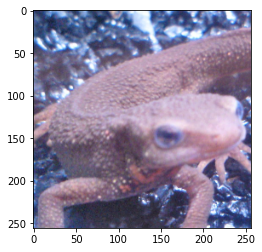

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

# img_orig = io.imread('https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/images/imori_256x256.png')
img_orig = io.imread('./dataset/images/imori_256x256.png')

plt.imshow(img_orig)
plt.show()

### Question No. 1 チャネル入れ替え
画像を読み込み、RGBをBGRの順に入れ替えよ。

In [2]:
img_orig.shape

(256, 256, 3)

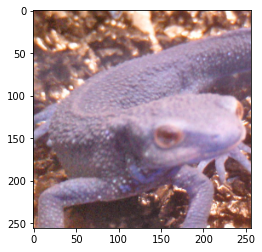

In [3]:
import copy
img_swap = copy.deepcopy(img_orig)
img_swap[:, :, 0] = img_orig[:, :, 2]
img_swap[:, :, 2] = img_orig[:, :, 0]
plt.imshow(img_swap)

### Memo


In [4]:
# img_orig

# Below slices are equal
# img_orig[:, :, 0]
# img_orig[..., 0]
# img_orig[Ellipsis, 0]

### Question No. 2 グレースケール Grayscale
画像をグレースケールにせよ。 グレースケールとは、画像の輝度表現方法の一種であり下式で計算される。

Grayscale = 0.2126 R + 0.7152 G + 0.0722 B

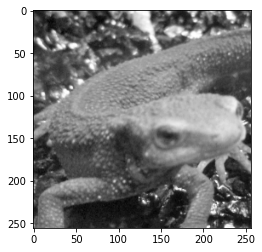

In [5]:
img_gray = copy.deepcopy(img_orig)
img_gray = img_orig[:, :, 0] * 0.2126 + img_orig[:, :, 1] * 0.7152 + img_orig[:, :, 2] * 0.0722
# img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap='gray')

### Question No. 3 二値化, Binarization
画像を二値化せよ。 二値化とは、画像を特定の値を閾値として黒と白の二値で表現する方法である。

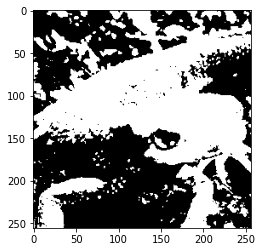

In [6]:
threshold = 127
_, img_binary = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)
plt.imshow(img_binary, cmap='gray')

### Question No. 4 大津の二値化, Otsu's binarization
大津の二値化（判別分析法）を実装せよ。

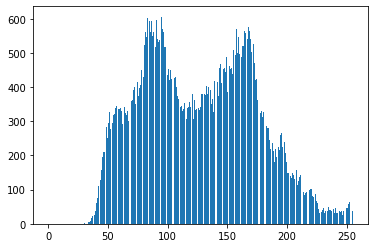

In [7]:
plt.hist(img_gray.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

threshold >> 127.0


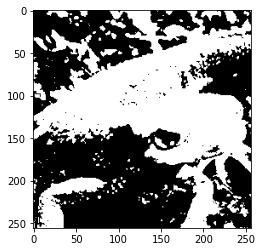

In [8]:
# img_gray.dtype
# dtype('float64')
# cv2.threshold() arg should be "uint8"
# so I will convert data type here

th, img_bin = cv2.threshold(img_gray.astype("uint8"), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print('threshold >>', th)
plt.imshow(img_bin, cmap="gray")

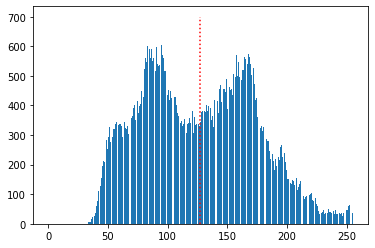

In [9]:
plt.hist(img_gray.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.vlines(th, 0, 700, colors="red", linestyles='dotted')
plt.show()

### Question No. 5 HSV変換, HSV transformation
HSV変換を実装して、色相Hを反転（Hを180度反転）せよ。
HSV変換とは、Hue(色相)、Saturation(彩度)、Value(明度) で色を表現する手法である。

Saturation ... 色の鮮やかさ。Saturationが低いと灰色さが顕著になり、くすんだ色となる。 ( 0 <= S < 1)  
Value ... 色の明るさ。Valueが高いほど白に近く、Valueが低いほど黒に近くなる。 ( 0 <= V < 1)  
Hue ... 色合いを0~360度で表現し、赤や青など色の種類を示す。 ( 0 <= H < 1) 色相は次の色に対応する。

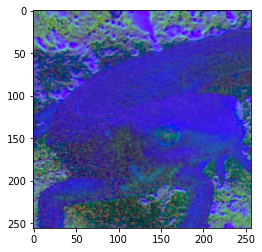

In [10]:
img_hsv = cv2.cvtColor(img_orig, cv2.COLOR_BGR2HSV)
img_hsv[:, :, 0] = (img_hsv[:, :, 0] + 90) % 180
# img_hsv[..., 0] = (img_hsv[..., 0] + 90) % 180
plt.imshow(img_hsv, cmap="hsv")

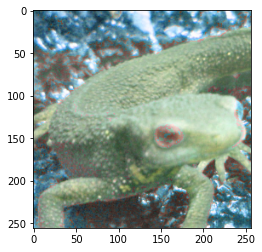

In [11]:
img_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(img_rgb)

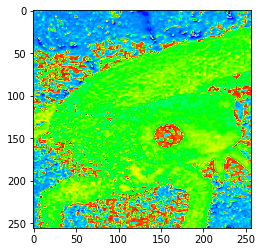

In [12]:
# Hue
plt.imshow(img_hsv[:, :, 0], cmap="hsv")

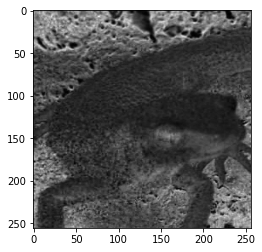

In [13]:
# Saturation
plt.imshow(img_hsv[..., 1], cmap='gray')

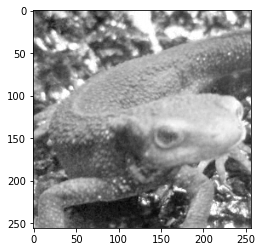

In [14]:
# Value
plt.imshow(img_hsv[..., 2], cmap='gray')

### Question No. 6 減色, color subtraction
ここでは画像の値を256^3から4^3、すなわちR,G,B を次式にしたがって{32, 96, 160, 224}の4値に減色せよ。 これは量子化操作である。

In [15]:
def color_subtraction(img, div=4):
    th = 256 // div
    return np.clip(img // th * th + th // 2, 0, 255)

img_sub = color_subtraction(img_orig) # color subtract

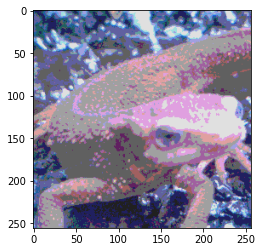

In [16]:
# print(img_sub)
plt.imshow(img_sub)

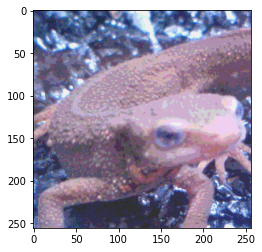

In [17]:
img_sub = color_subtraction(img_orig, div=8)
# print(img_sub)
plt.imshow(img_sub)

### Question No. 7 平均プーリング, average pooling
ここでは画像をグリッド分割(ある固定長の領域に分ける)し、かく領域内(セル)の平均値でその領域内の値を埋める。 このようにグリッド分割し、その領域内の代表値を求める操作はPooling(プーリング) と呼ばれる。 これらプーリング操作はCNN(Convolutional Neural Network) において重要な役割を持つ。

平均プーリングは次式で定義される。ここでいうRはプーリングを行う領域である。つまり、3x3の領域でプーリングを行う。|R|=3x3=9となる。

In [18]:
def pool_average(img, ksize_h=8, ksize_w=8):
    _img = img.copy().astype(np.float32)
    
    # padding
    h, w = img.shape[:2]
    outer_h = h % ksize_h
    pad_top = outer_h // 2
    pad_bottom = outer_h - pad_top
    outer_w = w % ksize_w
    pad_left = outer_w // 2
    pad_right = outer_w - pad_left
    
    # _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    _img = cv2.copyMakeBorder(_img, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, (0, 0, 0))
    out = np.zeros_like(_img)
    
    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2] # num of channels (ex. RGB -> 3)
    
    # filtering
    for iy in range(0, new_h, ksize_h):
        for ix in range(0, new_w, ksize_w):
            for ic in range(c):
                out[iy : iy + ksize_h, ix : ix + ksize_w, ic] = _img[iy : iy + ksize_h, ix : ix + ksize_w, ic].mean()
    # Below script is not the same function
    # maybe, the reason is that size of sliding window is not the same
    # out = cv2.blur(_img, (ksize_h, ksize_w))
    
    out = out[pad_top : pad_top + h, pad_left : pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

img_pool = pool_average(img_orig) # pooling

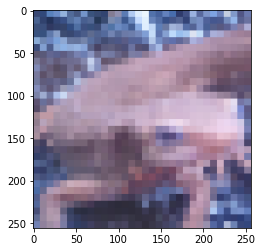

In [19]:
plt.imshow(img_pool)

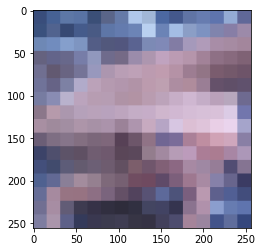

In [20]:
img_pool = pool_average(img_orig, ksize_h=16, ksize_w=16)
plt.imshow(img_pool)

### Question No. 8 最大プーリング, max pooling


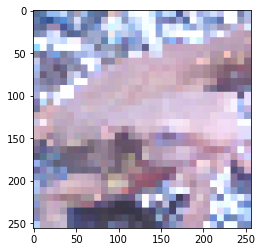

In [21]:
def pool_max(img, ksize_h=8, ksize_w=8):
    _img = img.copy().astype(np.float32)
    
    # padding
    h, w = img.shape[:2]
    outer_h = h % ksize_h
    pad_top = outer_h // 2
    pad_bottom = outer_h - pad_top
    outer_w = w % ksize_w
    pad_left = outer_w // 2
    pad_right = outer_w - pad_left
    
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img)
    
    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]
    
    # filtering
    for iy in range(0, new_h, ksize_h):
        for ix in range(0, new_w, ksize_w):
            for ic in range(c):
                out[iy : iy + ksize_h, ix : ix + ksize_w, ic] = _img[iy : iy + ksize_h, ix : ix + ksize_w, ic].max()
            
    out = out[pad_top : pad_top + h, pad_left : pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

img_pool = pool_max(img_orig) # pooling
plt.imshow(img_pool)

### Question No. 9 ガウシアンフィルタ, gaussian filter
ガウシアンフィルタ(3x3、標準偏差1.3)を実装し、imori_256x256_noise.pngのノイズを除去せよ。

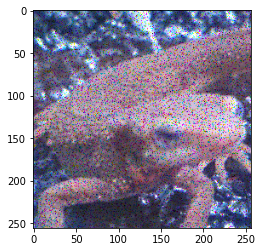

In [22]:
# img_noise_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_noise.png')
img_noise_orig = io.imread('./dataset/images/imori_256x256_noise.png')
plt.imshow(img_noise_orig)

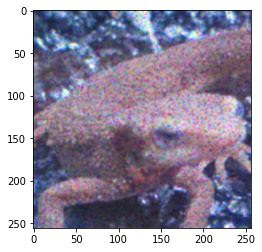

In [23]:
img_gau = cv2.GaussianBlur(img_noise_orig, (3,3), 1.3)
plt.imshow(img_gau)

### Question No. 10 メディアンフィルタ, median filter
次にメディアンフィルタ(3x3)を実装し、imori_256x256_noise.jpgのノイズを除去せよ。メディアン値(中央値)を出力するフィルタである。

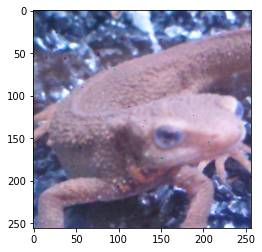

In [24]:
img_med = cv2.medianBlur(img_noise_orig, 3)
plt.imshow(img_med)